In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [32]:
data=pd.read_csv('pimaindiandiabeties.csv')
data

,Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetiesFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [33]:
data.describe()

,Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetiesFunction,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
data.isnull().sum()

Pregnancies          0
Glucose              0
BloodPressure        0
Skinthickness        0
Insulin              0
BMI                  0
DiabetiesFunction    0
Age                  0
Class                0
dtype: int64

In [35]:
data.nunique()

Pregnancies           17
Glucose              136
BloodPressure         47
Skinthickness         51
Insulin              186
BMI                  248
DiabetiesFunction    516
Age                   52
Class                  2
dtype: int64

In [36]:
data.dtypes

Pregnancies            int64
Glucose                int64
BloodPressure          int64
Skinthickness          int64
Insulin                int64
BMI                  float64
DiabetiesFunction    float64
Age                    int64
Class                  int64
dtype: object

In [37]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Skinthickness', 'Insulin',
       'BMI', 'DiabetiesFunction', 'Age', 'Class'],
      dtype='object')

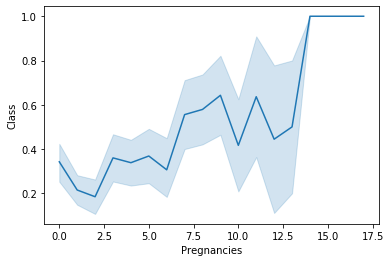

In [38]:
sns.lineplot(x='Pregnancies',y='Class',data=data);

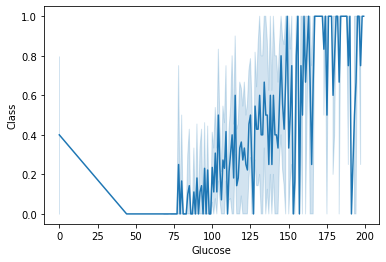

In [39]:
sns.lineplot(x='Glucose',y='Class',data=data);

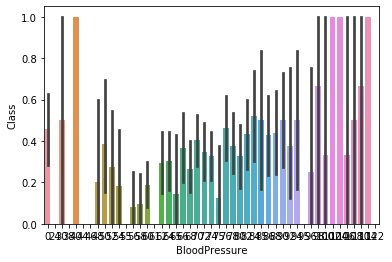

In [40]:
sns.barplot(x='BloodPressure',y='Class',data=data);

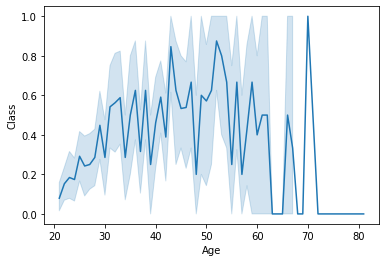

In [41]:
sns.lineplot(x='Age',y='Class',data=data);

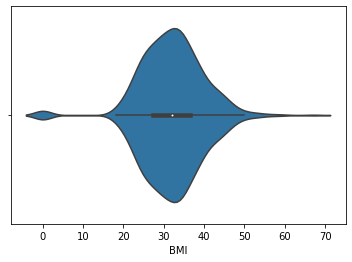

In [42]:
sns.violinplot(data['BMI']);

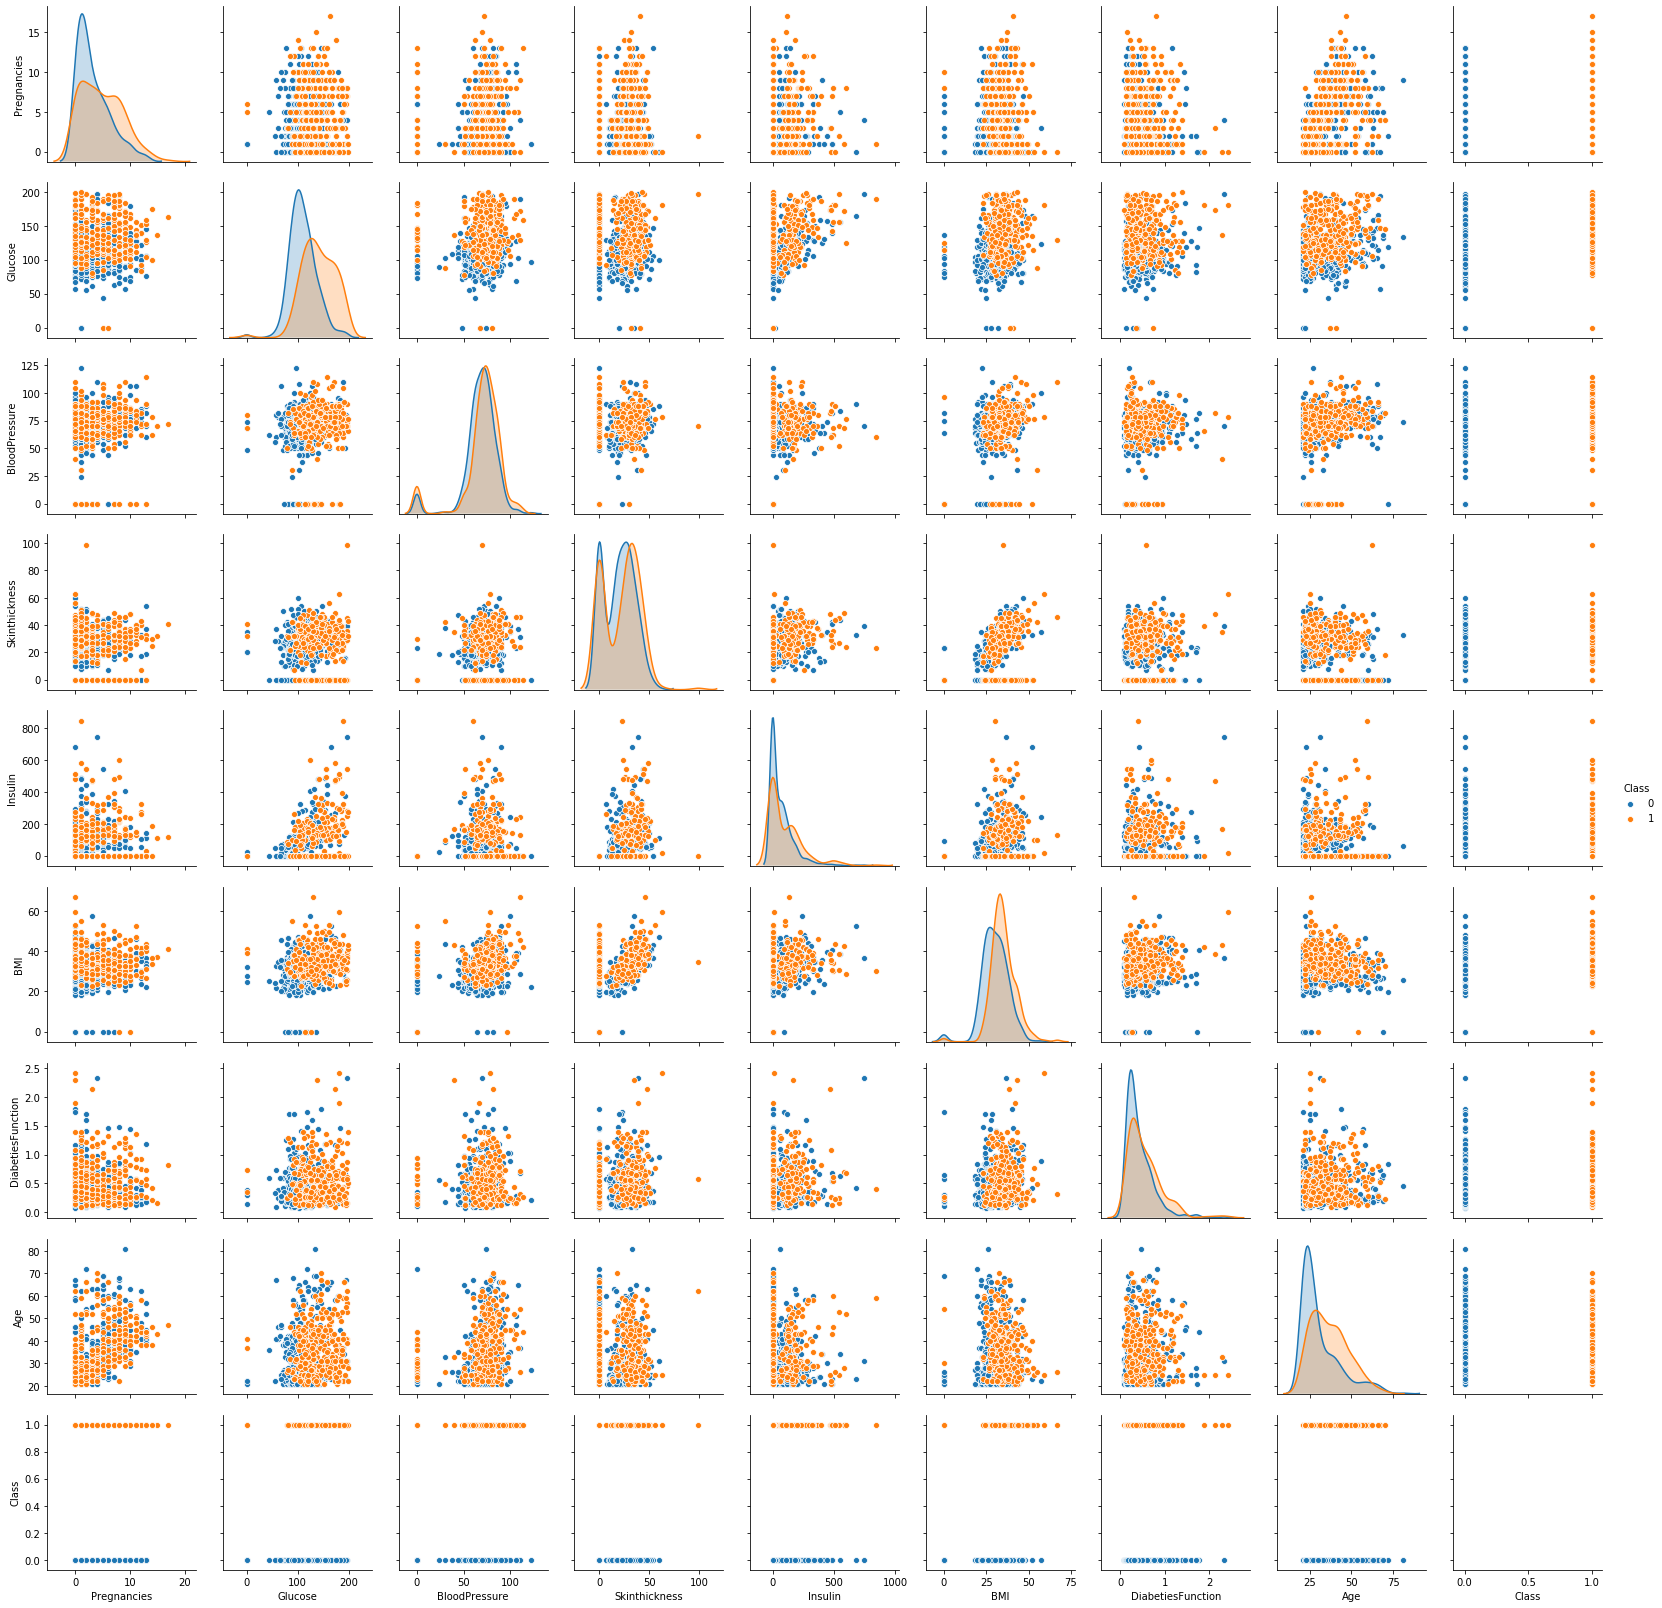

In [43]:


sns.pairplot(data,hue='Class');

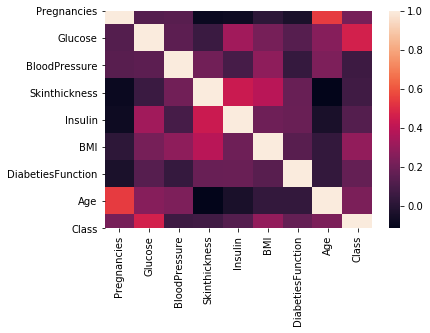

In [44]:
sns.heatmap(data.corr())

In [45]:
df_x=data.drop(['Class'],axis=1)
y=data['Class']
df_x.shape,y.shape

((767, 8), (767,))

In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetiesFunction,Age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086
...,...,...,...,...,...,...,...,...
762,1.827945,-0.621423,0.356400,1.723720,0.868833,0.115363,-0.907610,2.535709
763,-0.546874,0.035698,0.046411,0.406582,-0.693559,0.610039,-0.397469,-0.529522
764,0.343683,0.004406,0.149740,0.155698,0.278596,-0.734465,-0.684235,-0.274086
765,-0.843726,0.160863,-0.470238,-1.286882,-0.693559,-0.239789,-0.370302,1.173384


In [47]:
x.shape,y.shape

((767, 8), (767,))

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [49]:
lr=LogisticRegression()
svc=SVC()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
ad=AdaBoostClassifier()

In [50]:
model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('GaussianNB',nb))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('XGBoostClassifier',xgb))
model_list.append(('AdBoostingClassifier',ad))

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)


********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.8116883116883117


cross_val is  0.7745557074504443


F1_score is 0.7238095238095237


roc_auc_score 0.781786941580756


classification report               precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.79      0.67      0.72        57

    accuracy                           0.81       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



confusion matrix
 [[87 10]
 [19 38]]





********************** SVC ************************
SVC(C=1.0, cache_size=200

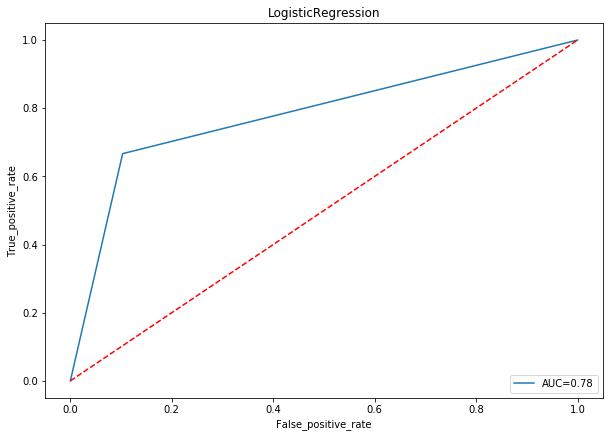

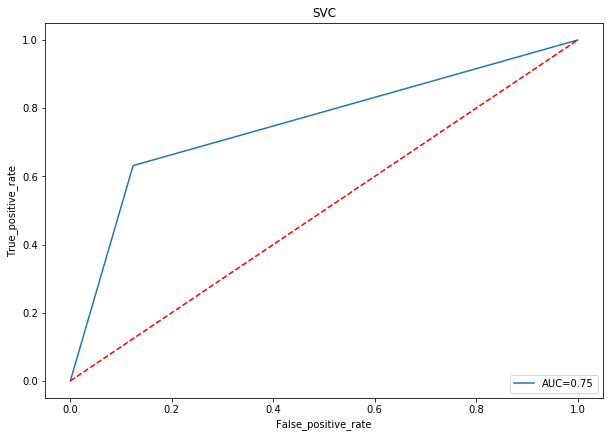

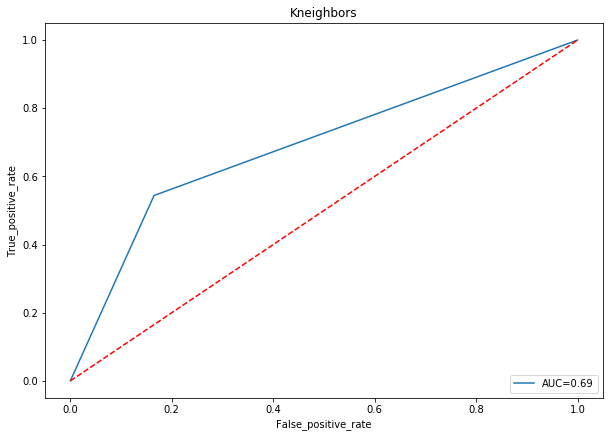

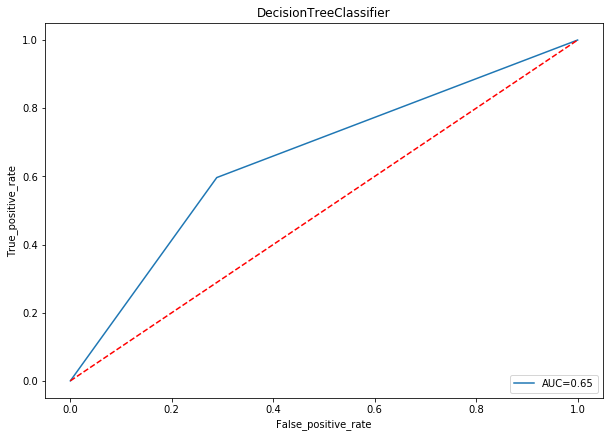

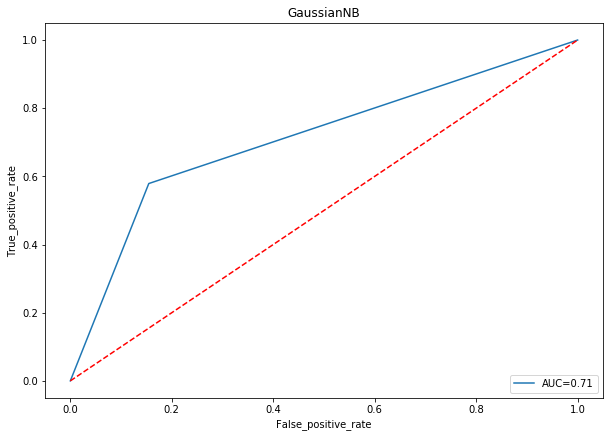

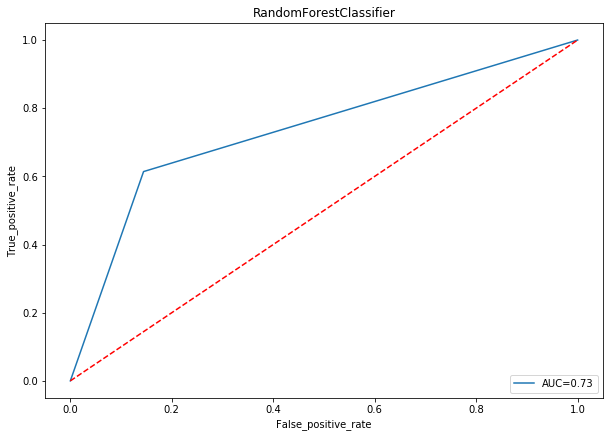

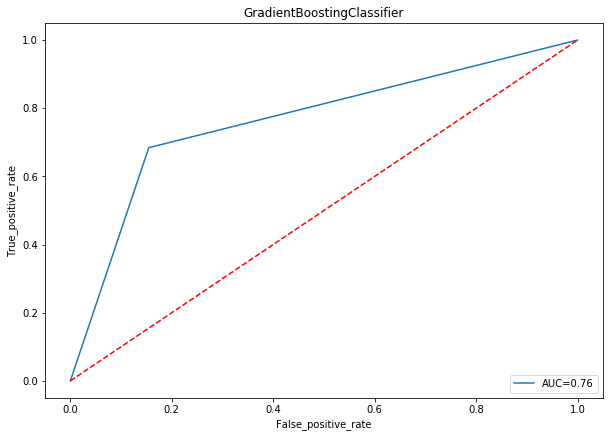

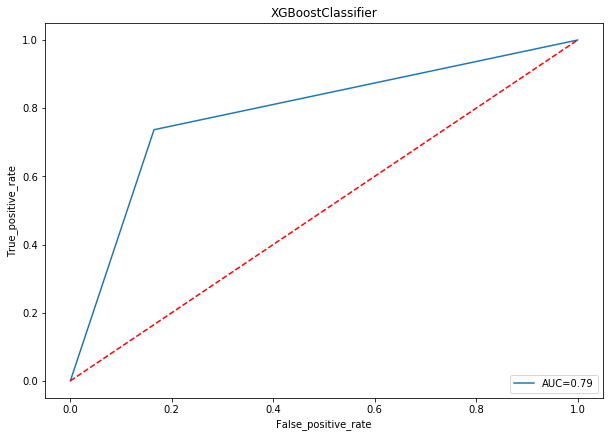

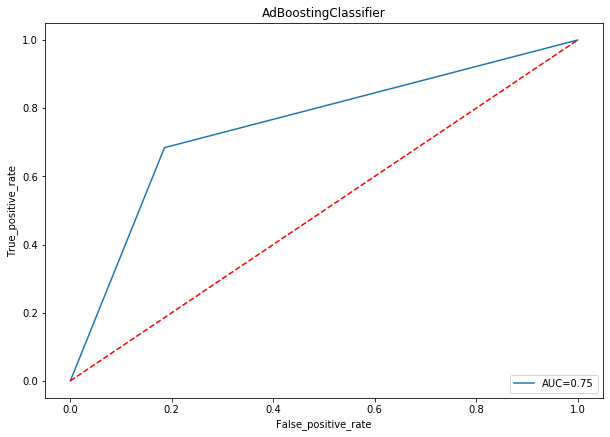

In [52]:
Model=[]
accuracy=[]
CS=[]
F1_score=[]
rocscore=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(y_test,pred)
    print('F1_score is',f1)
    F1_score.append(f1*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(511)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False_positive_rate')
    plt.ylabel('True_positive_rate')
    print('\n\n')

In [53]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_Score':F1_score,'Roc_score':rocscore})
best_model

,Model,Accuracy,CV_Score,F1_Score,Roc_score
0,LogisticRegression,81.168831,77.455571,72.380952,78.178694
1,SVC,78.571429,76.143199,68.571429,75.393380
2,Kneighbors,72.727273,73.544087,59.615385,68.945560
3,DecisionTreeClassifier,66.883117,70.283664,57.142857,65.391572
4,GaussianNB,74.675325,75.493848,62.857143,71.215410
5,RandomForestClassifier,76.623377,73.410800,66.037736,73.485260
6,GradientBoostingClassifier,78.571429,76.408066,70.270270,76.478568
7,XGBoostClassifier,79.870130,76.148325,73.043478,78.594683
8,AdBoostingClassifier,76.623377,75.370813,68.421053,74.932176


In [54]:
from sklearn.model_selection import GridSearchCV

svcgd=GridSearchCV(svc,param_grid=[{'kernel':['linear','rbf'],
                                    'C':[1,10]}],cv=5)
svcgd.fit(x_train,y_train)
print(svcgd.best_score_)
print(svcgd.best_params_)
                    

0.7585644371941273
{'C': 1, 'kernel': 'linear'}


In [55]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
knngd=GridSearchCV(knn,param_grid=[{'n_neighbors':[i for i in range(1,33,2)],
                                 'weights':['uniform','distance']}],cv=5)
knngd.fit(x_train,y_train)
print(knngd.best_score_)
print(knngd.best_params_)
                            

0.7520391517128875
{'n_neighbors': 13, 'weights': 'distance'}


In [59]:
rf=RandomForestClassifier()
gd=GridSearchCV(rf,param_grid=[{'n_estimators':[50,100,150,200],
                                'criterion':['gini','entropy'],
                                 'max_depth':[2,3,5,7,8],
                                 'bootstrap':[True,False]}],n_jobs=-1,cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.763458401305057
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}


In [60]:
gb=GradientBoostingClassifier()
gd=GridSearchCV(gb,param_grid=[{'n_estimators':[50,100,150,200],
                                'loss':['deviance','exponential'],
                                 
                                 'max_depth':[2,3,4,5,6,7,8]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.7601957585644372
{'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100}


In [61]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
gd=GridSearchCV(xgb,param_grid=[{'n_estimators':[100,150,200],
                                 'max_depth':[2,3,4,5,6,7,8],
                                  }],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.7601957585644372
{'max_depth': 2, 'n_estimators': 100}


In [62]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
gd=GridSearchCV(ad,param_grid=[{'base_estimator':[lr]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.7553017944535073
{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)}


In [74]:
#Dummy Classifier()

In [65]:
X = data.drop(['Class'],axis=1)
y = data['Class']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('y actual : \n' +  str(y_test.value_counts()))
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    124
1     68
Name: Class, dtype: int64
y predicted : 
0    192
dtype: int64


In [71]:
from sklearn.metrics import recall_score,precision_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.6458333333333334
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[124   0]
 [ 68   0]]


In [72]:
lrdm = LogisticRegression().fit(X_train,y_train)
y_pred = lrdm.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


Accuracy Score : 0.8125
Precision Score : 0.7758620689655172
Recall Score : 0.6617647058823529
F1 Score : 0.7142857142857142
Confusion Matrix : 
[[111  13]
 [ 23  45]]


In [73]:
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_lrdm_acc = GridSearchCV(lrdm, param_grid = grid_values,scoring = 'recall')
grid_lrdm_acc.fit(X_train, y_train)

y_pred_acc = grid_lrdm_acc.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

confusion_matrix(y_test,y_pred_acc)


Accuracy Score : 0.8020833333333334
Precision Score : 0.7586206896551724
Recall Score : 0.6470588235294118
F1 Score : 0.6984126984126984


array([[110,  14],
       [ 24,  44]], dtype=int64)

In [75]:
from sklearn.externals import joblib
joblib.dump(lr,'pima_indian_diabeties_joblib')

['pima_indian_diabeties_joblib']